###### importing important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### reading dataset

In [2]:
df=pd.read_csv('Data_set/Real-Data/Real_Combine.csv')

df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

###### Checking for null values

In [3]:
df.describe()

T          TM          Tm          SLP           H  \
count  731.000000  731.000000  731.000000   731.000000  731.000000   
mean    25.556908   32.231874   19.273598  1008.196854   64.134063   
std      7.286760    6.852548    7.454202     7.564601   15.460460   
min      6.700000    9.800000    0.000000   991.500000   20.000000   
25%     18.850000   27.550000   12.000000  1001.300000   55.000000   
50%     27.700000   34.100000   21.000000  1008.500000   66.000000   
75%     31.200000   36.900000   25.900000  1015.000000   75.000000   
max     38.500000   45.500000   32.700000  1023.200000   98.000000   

               VV           V          VM      PM 2.5  
count  731.000000  731.000000  731.000000  730.000000  
mean     1.891929    6.630369   15.696580  107.929150  
std      0.686446    3.967064    7.654019   82.576607  
min      0.300000    0.400000    1.900000    0.000000  
25%      1.400000    3.500000   11.100000   43.583333  
50%      1.900000    6.300000   14.800000   81.729167  
75%      2.400000    9.100000   18.300000  153.934375  
max      5.800000   24.400000   57.600000  404.500000

<AxesSubplot:>

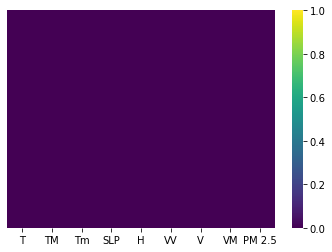

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
## removing null value
df=df.dropna()
df.describe()

T          TM          Tm          SLP           H  \
count  730.000000  730.000000  730.000000   730.000000  730.000000   
mean    25.572329   32.249726   19.285068  1008.180000   64.097260   
std      7.279810    6.840215    7.452854     7.556041   15.438985   
min      6.700000    9.800000    0.000000   991.500000   20.000000   
25%     18.900000   27.600000   12.025000  1001.300000   55.000000   
50%     27.700000   34.100000   21.000000  1008.450000   66.000000   
75%     31.200000   36.900000   25.900000  1015.000000   75.000000   
max     38.500000   45.500000   32.700000  1023.200000   98.000000   

               VV           V          VM      PM 2.5  
count  730.000000  730.000000  730.000000  730.000000  
mean     1.892329    6.632877   15.702877  107.929150  
std      0.686832    3.969204    7.657372   82.576607  
min      0.300000    0.400000    1.900000    0.000000  
25%      1.400000    3.500000   11.100000   43.583333  
50%      1.900000    6.300000   14.800000   81.729167  
75%      2.400000    9.100000   18.300000  153.934375  
max      5.800000   24.400000   57.600000  404.500000

###### seperating independent and dependent features

In [6]:
x=df.drop(columns=('PM 2.5')) ## independent features

y=df['PM 2.5'] ## dependent features

###### checking for relationship

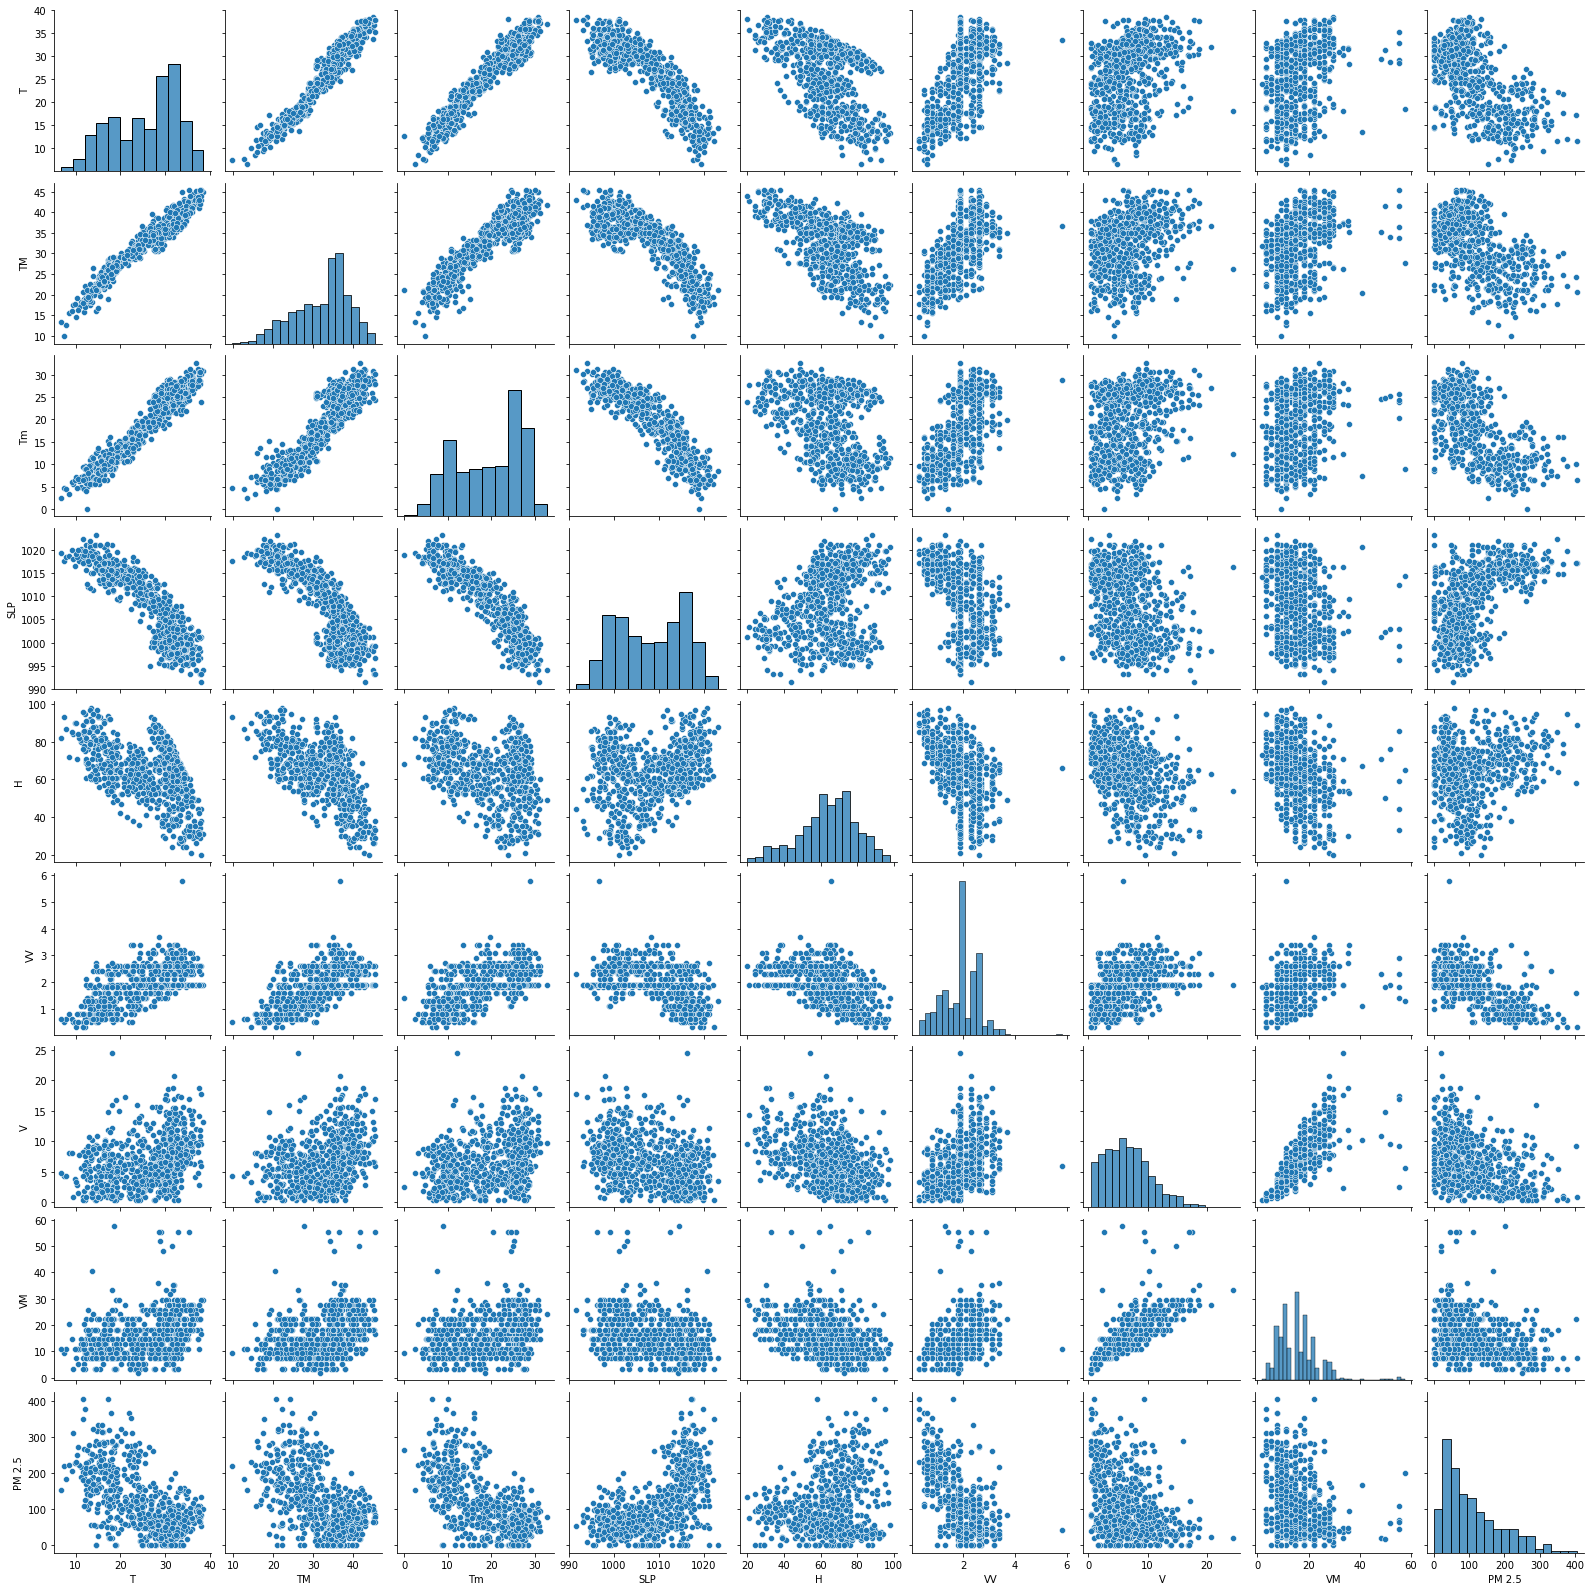

In [7]:
sns.pairplot(df)

In [8]:
df.corr() ## gives the correlation b/w each and every column

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

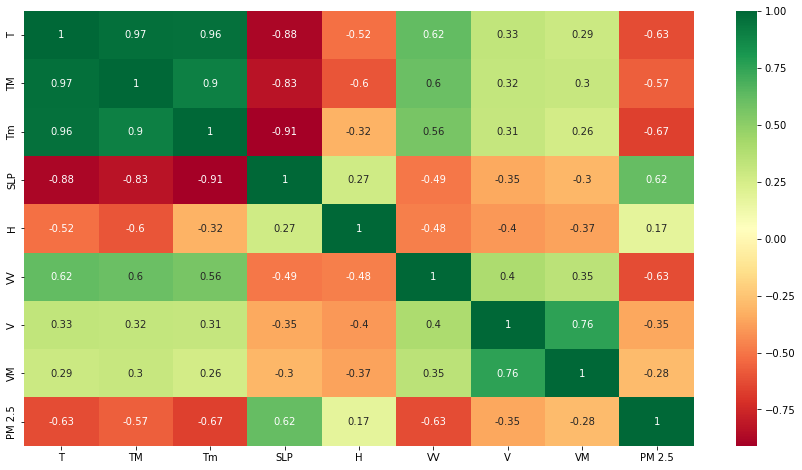

In [9]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,8))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [11]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [12]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [13]:
print(model.feature_importances_)

[0.12834519 0.09969721 0.19748841 0.13708159 0.08333525 0.26222285
 0.05238749 0.039442  ]


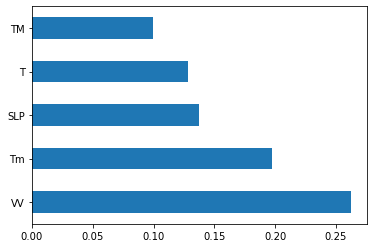

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

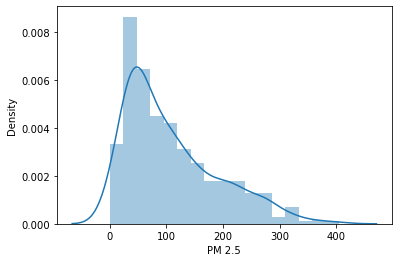

In [15]:
sns.distplot(y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

-----------------------

### Linear_Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [19]:
Lr.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [20]:
Lr.intercept_

-157.37425475061565

In [21]:
Lr.score(x_train, y_train) ## checking accuracy

0.6007706404750854

In [22]:
Lr.score(x_test, y_test)

0.5316188612878154

In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5)
score.mean

<function ndarray.mean>

###### model Evaluation

In [24]:
coeff_df = pd.DataFrame(Lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

Coefficient
T       2.639490
TM      0.519979
Tm     -7.598118
SLP     0.493220
H      -0.837064
VV    -50.430135
V      -2.754178
VM     -0.039266

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

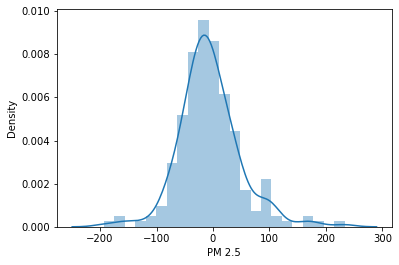

In [25]:
prediction=Lr.predict(x_test)
sns.distplot(y_test-prediction)

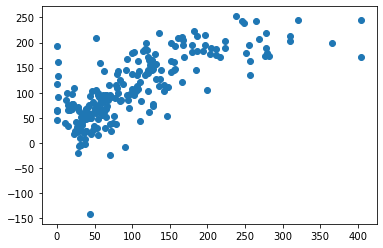

In [26]:
plt.scatter(y_test,prediction)

In [27]:
from sklearn import metrics

## RMSE = Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 55.29614931144969


-----------------------

### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge=Ridge()
parameters={'alpha':[1e-10,1e-3,1,20,30,40]}

ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 0.001, 1, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3354.617157307127


### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [32]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\partha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e+05, tolerance: 4.247e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+05, tolerance: 3.871e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.945e+05, toler

{'alpha': 5}
-3356.4102569706833


###### model Evaluation

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

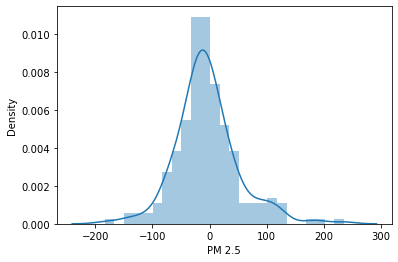

In [33]:
prediction=lasso_regressor.predict(x_test)
sns.distplot(y_test-prediction)

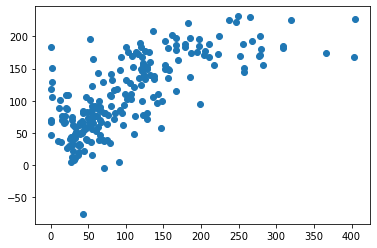

In [34]:
plt.scatter(y_test,prediction)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.15696946997224
MSE: 3103.265102660339
RMSE: 55.70695739905689


------------------

#### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(x_train,y_train)

C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [38]:
dtree.score(x_train, y_train)

1.0

In [39]:
dtree.score(x_test, y_test)

0.3118066465334174

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

score.mean()

C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classe

0.14414869456821508

#### Tree Visualization

In [41]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

[Text(0.3539276002296764, 0.9782608695652174, 'X[5] <= 1.35\nmse = 6915.062\nsamples = 511\nvalue = 110.057'),
 Text(0.14638700211026115, 0.9347826086956522, 'X[5] <= 1.05\nmse = 4920.21\nsamples = 119\nvalue = 213.549'),
 Text(0.06486580058032182, 0.8913043478260869, 'X[6] <= 0.8\nmse = 4045.174\nsamples = 76\nvalue = 231.4'),
 Text(0.015826958586125033, 0.8478260869565217, 'X[3] <= 1016.95\nmse = 4853.276\nsamples = 7\nvalue = 293.148'),
 Text(0.008441044579266685, 0.8043478260869565, 'X[1] <= 23.75\nmse = 1839.176\nsamples = 4\nvalue = 240.133'),
 Text(0.0042205222896333425, 0.7608695652173914, 'X[0] <= 14.45\nmse = 33.11\nsamples = 2\nvalue = 282.662'),
 Text(0.0021102611448166712, 0.717391304347826, 'mse = 0.0\nsamples = 1\nvalue = 276.908'),
 Text(0.006330783434450013, 0.717391304347826, 'mse = 0.0\nsamples = 1\nvalue = 288.417'),
 Text(0.012661566868900026, 0.7608695652173914, 'X[0] <= 17.25\nmse = 27.782\nsamples = 2\nvalue = 197.604'),
 Text(0.010551305724083356, 0.71739130434

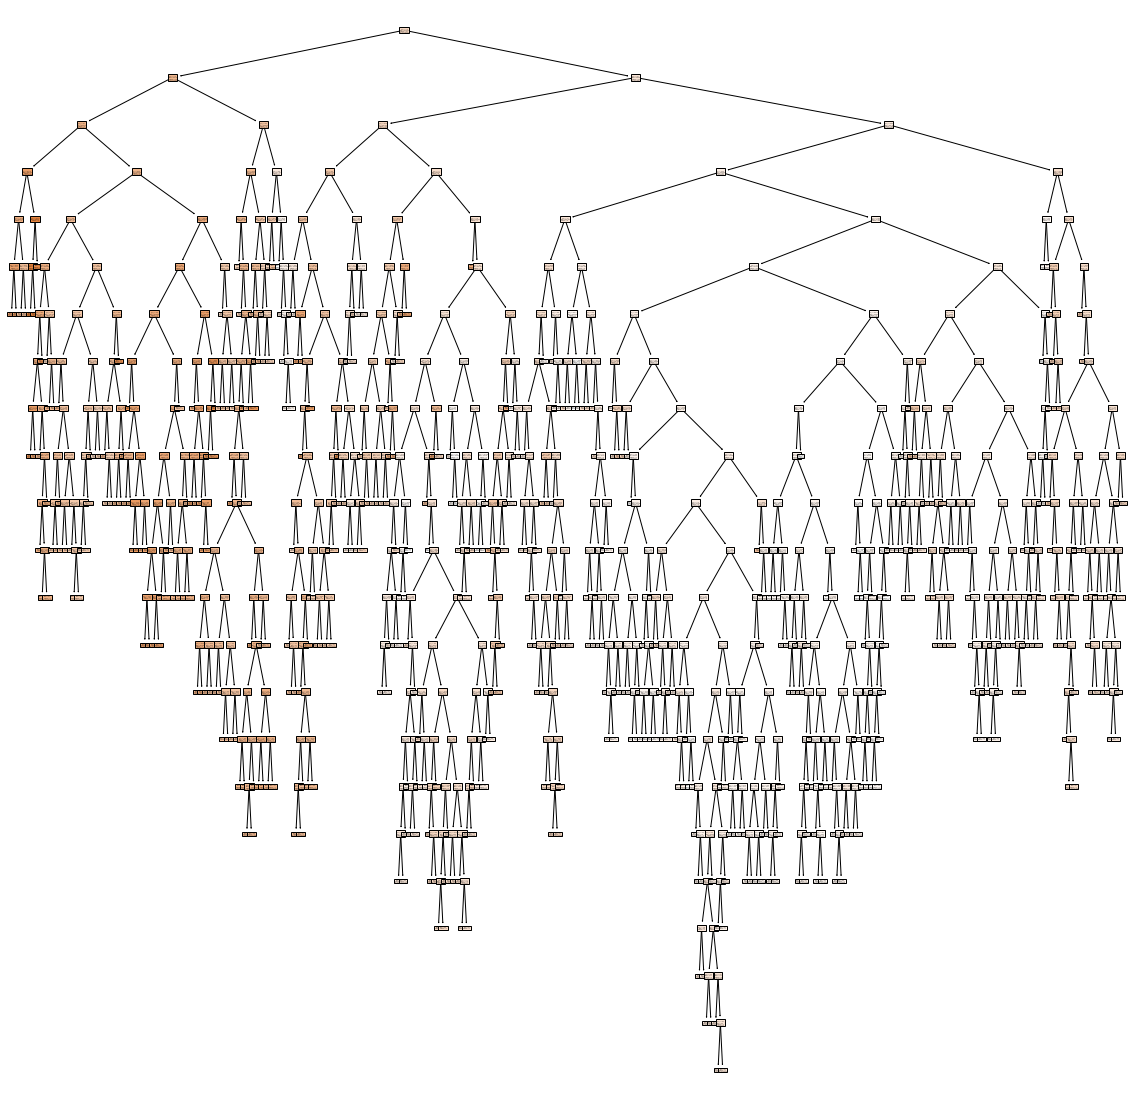

In [42]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True)

###### model Evaluation

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

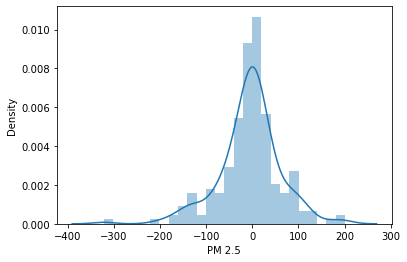

In [43]:
prediction=dtree.predict(x_test)

sns.distplot(y_test-prediction)

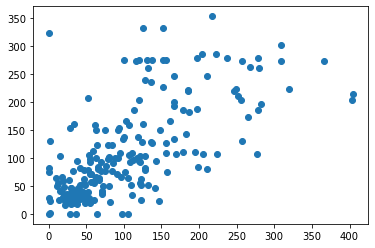

In [44]:
plt.scatter(y_test,prediction)

#####  Hyperparameter Tuning DEcision Tree Regressor

In [45]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70] 
}

In [46]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [47]:
random_search.fit(x,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


C:\Users\partha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(criterion='mse'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [48]:
random_search.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [49]:
random_search.best_score_

-2974.137884843525

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

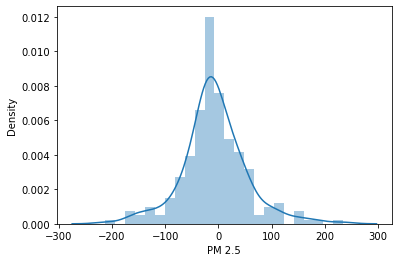

In [50]:
predictions=random_search.predict(x_test)

sns.distplot(y_test-predictions)

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 46.092351598173515
MSE: 4492.63208222349
RMSE: 67.02709961070589


---------------------

### K_Nearest_Neighbor_Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [55]:
regressor.score(x_train, y_train)

1.0

In [56]:
regressor.score(x_test, y_test)

-0.08045200427243504

In [57]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

score.mean()

-0.12260548546487755

###### model Evaluation

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

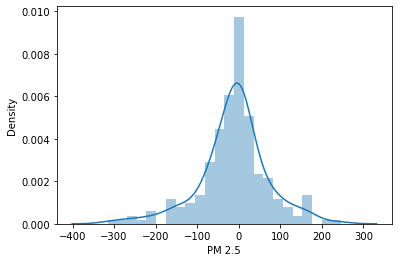

In [58]:
prediction=regressor.predict(x_test)

sns.distplot(y_test-prediction)

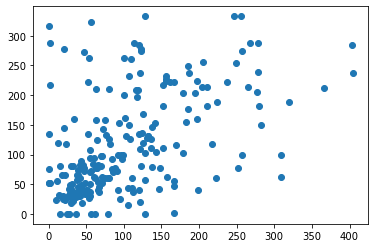

In [59]:
plt.scatter(y_test,prediction)

In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 57.635540334855406
MSE: 7053.356899257989
RMSE: 83.98426578388353


#####  Hyperparameter Tuning

In [61]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

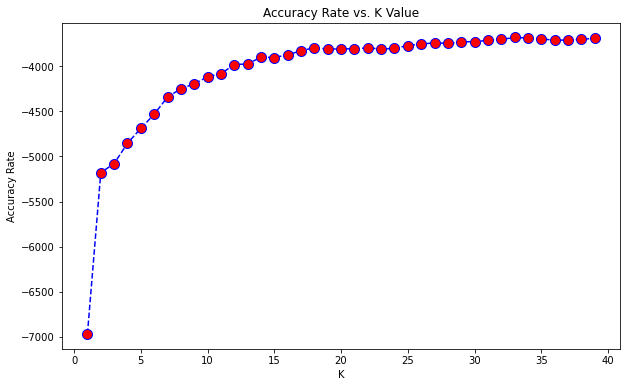

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

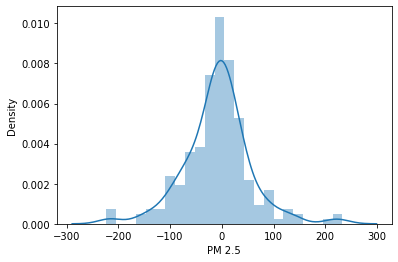

In [63]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train,y_train)

predictions = knn.predict(x_test)

sns.distplot(y_test-predictions)

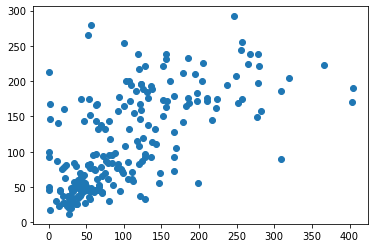

In [64]:
plt.scatter(y_test,predictions)

In [65]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 57.635540334855406
MSE: 7053.356899257989
RMSE: 83.98426578388353


---------------------

### Random_Forest_Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
regressor.score(x_train, y_train)

0.9494452892738856

In [69]:
regressor.score(x_test, y_test)

0.6411044674451458

In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

score.mean()

0.4976085227244658

###### model Evaluation

In [71]:
prediction=regressor.predict(x_test)

sns.distplot(y_test-prediction)

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

In [72]:
plt.scatter(y_test,prediction)

##### Hyperparameter Tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
 #Randomized Search CV

# Number of trees in random forest "num = 12" => " select 12 random num b/w 100 to 1200"
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [75]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [76]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [77]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=20

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [80]:
rf_random.score(x_train, y_train)

-338.834860938935

In [81]:
rf_random.score(x_test, y_test)

-2543.791570398308

In [82]:
rf_random.best_score_

-2586.9013829508704

In [83]:
predictions=rf_random.predict(x_test)

sns.distplot(y_test-predictions)

C:\Users\partha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

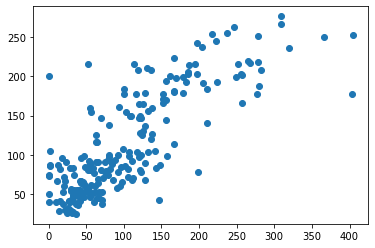

In [84]:
plt.scatter(y_test,prediction)

In [85]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.40785901826484
MSE: 2342.9252485521383
RMSE: 48.40377308177678


In [86]:
import pickle 

# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)